In [2]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns
import matplotlib.pyplot as plt

from db_manager import table_to_dataframe

In [3]:
pio.renderers.default = "notebook"

In [4]:
df = table_to_dataframe(db_name="crispr_sgRNA.db", table_name="clean_data")

Соединение с БД закрыто.


## EDA

Посмотрим на типы данных и количество пропусков в столбцах: 

In [5]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248 entries, 0 to 26247
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   key                  26248 non-null  object 
 1   perfect_match_sgRNA  26248 non-null  object 
 2   gene                 26248 non-null  object 
 3   sgRNA_sequence       26248 non-null  object 
 4   mismatch_position    26248 non-null  int64  
 5   new_pairing          26248 non-null  object 
 6   K562                 26248 non-null  int64  
 7   Jurkat               26248 non-null  int64  
 8   mean_relative_gamma  26248 non-null  float64
 9   genome_input         26248 non-null  object 
 10  sgRNA_input          26248 non-null  object 
 11  encoded_or           26248 non-null  object 
 12  encoded_stacked      26248 non-null  object 
 13  encoded_7channels    26248 non-null  object 
 14  gc_content           26248 non-null  float64
 15  pam                  26248 non-null 

Для числовых столбцов посмотрим на основные статистики:

In [6]:
df.describe()

mismatch_position          K562        Jurkat  mean_relative_gamma  \
count       26248.000000  26248.000000  26248.000000         26248.000000   
mean           -9.053490      0.852713      0.543432             0.280410   
std             4.946003      0.354399      0.498120             0.389325   
min           -19.000000      0.000000      0.000000            -0.319067   
25%           -12.000000      1.000000      0.000000            -0.003163   
50%            -9.000000      1.000000      1.000000             0.058403   
75%            -5.000000      1.000000      1.000000             0.564199   
max            -1.000000      1.000000      1.000000             2.278508   

         gc_content  
count  26248.000000  
mean       0.687885  
std        0.084510  
min        0.384615  
25%        0.615385  
50%        0.692308  
75%        0.730769  
max        0.961538

Распределение некоторых признаков:

In [26]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("PAM", "Mismatch Position", "GC Content", "New Pairing"),
    vertical_spacing=0.1
)

# Строим гистограммы для каждого столбца
columns = ["pam", "mismatch_position", "gc_content", "new_pairing"]
for i, col in enumerate(columns):
    hist = px.histogram(df, x=col)
    
    # Добавляем зазор между столбцами
    hist.update_traces(marker_line_width=0.5, marker_line_color="black")
    hist.update_layout(bargap=1)  # 0.2 = 20% зазора между столбцами
    
    for trace in hist["data"]:
        fig.add_trace(trace, row=(i // 2) + 1, col=(i % 2) + 1)

fig.update_layout(
    height=700, width=1000,
    title_text="Распределение по различным признакам",
    margin=dict(l=20, r=20, t=50, b=20)
)

# Настраиваем размеры и отступы
fig.update_layout(
    height=700, width=1000,
    title_text="Распределение по различным признакам",
    margin=dict(l=20, r=20, t=50, b=20)
)

fig.show()

Построим распределение таргетной величины:

In [27]:
fig = px.histogram(df, x="mean_relative_gamma", width=1200, height=450)
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

Распределение таргетной величины по группам PAM:

In [34]:
fig = px.violin(df, y="mean_relative_gamma", x='pam', box=True)
fig.show()

Распределение таргетной величины в зависимости от mismatch_position:

<Axes: xlabel='mismatch_position', ylabel='mean_relative_gamma'>

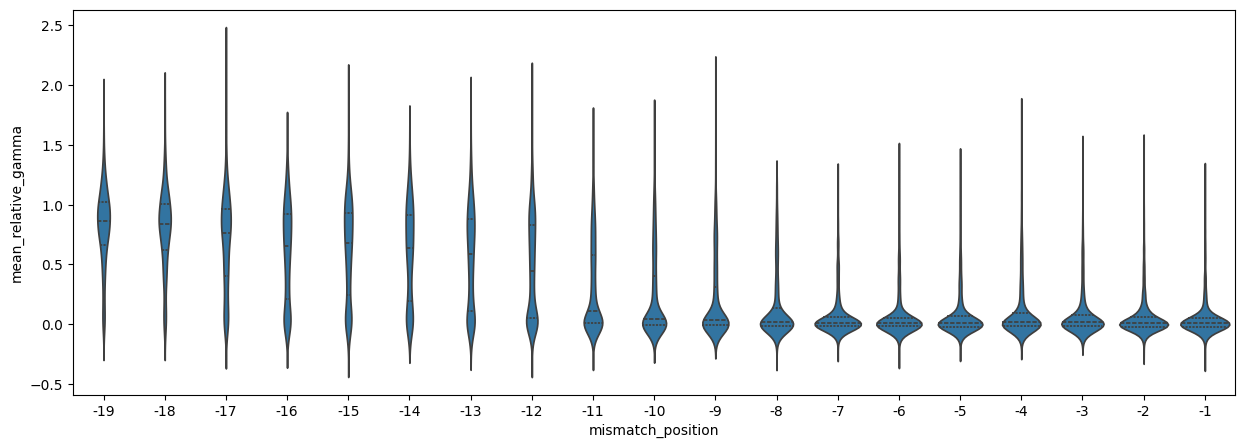

In [16]:
dims = (15, 5)
fig, ax = plt.subplots(figsize=dims)
sns.violinplot(x="mismatch_position", y="mean_relative_gamma", data=df, inner="quarth")

Посчитаем корреляцию между числовыми переменными:

In [7]:
df.corr(method='pearson', numeric_only=True)

mismatch_position      K562    Jurkat  \
mismatch_position             1.000000  0.005308  0.007886   
K562                          0.005308  1.000000 -0.380945   
Jurkat                        0.007886 -0.380945  1.000000   
mean_relative_gamma          -0.583286  0.003082 -0.008141   
gc_content                    0.025128 -0.081635  0.000281   

                     mean_relative_gamma  gc_content  
mismatch_position              -0.583286    0.025128  
K562                            0.003082   -0.081635  
Jurkat                         -0.008141    0.000281  
mean_relative_gamma             1.000000    0.073448  
gc_content                      0.073448    1.000000

In [8]:
df.corr(method='spearman', numeric_only=True)

mismatch_position      K562    Jurkat  \
mismatch_position             1.000000  0.004255  0.008163   
K562                          0.004255  1.000000 -0.380945   
Jurkat                        0.008163 -0.380945  1.000000   
mean_relative_gamma          -0.537291  0.016620 -0.009089   
gc_content                    0.024265 -0.078312  0.001432   

                     mean_relative_gamma  gc_content  
mismatch_position              -0.537291    0.024265  
K562                            0.016620   -0.078312  
Jurkat                         -0.009089    0.001432  
mean_relative_gamma             1.000000    0.064414  
gc_content                      0.064414    1.000000

Явную корреляцию таргетная переменная имеет только с признаком *mismatch_position*